# Subgroup A: Guest Journey Analysis and Segmentation

## What are the key factors influencing guest satisfaction throughout their journey?
- Analyse survey responses and operational data to identify the main drivers of satisfaction and dissatisfaction at each touchpoint.
- Propose metrics for tracking guest satisfaction over time.

## Business Context: USS

From a business perspective, USS (Universal Studios Singapore) aims to achieve two main objectives:

1. **Increase Revenue**: Revenue growth for USS is largely driven by factors such as ticket sales, merchandise purchases, food and beverage sales, and the use of services like Express Passes. By improving guest satisfaction at key touchpoints (e.g., attraction experiences, food quality, overall park services), USS can increase customer spending and upsell services.

2. **Increase Footfall**: Another crucial objective is increasing the number of visitors to the park. Satisfied guests are more likely to recommend the park to others, leave positive reviews, and return in the future, all of which can drive higher footfall. Enhancing experiences in areas like food variety, ride satisfaction, and overall park cleanliness can encourage more guests to visit and come back.

### Why These Factors Matter:
- By focusing on **Revenue** and **Footfall**, we align our analysis with USS's core business goals. Tracking guest satisfaction and its impact on these metrics will help USS prioritise improvements in areas that directly influence guest spending and repeat visits.
- Our scoring model reflects these business objectives by calculating scores related to **Revenue** and **Visitor Footfall**, allowing USS to measure how well different aspects of the guest experience align with their goals.


In [795]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from collections import Counter

In [796]:
#Load in Datasets
correlationplot = pd.read_csv("C:/Users/User/Documents/AAAA NUS Y4S1/DSA3101/survey_data_17features.csv")
survey_data = pd.read_csv("C:/Users/User/Documents/AAAA NUS Y4S1/DSA3101/final_synthetic_data.csv")

In [797]:
survey_data.head()

,age,gender,occupation,visitor_profile,ticket_purchase_method,ticket_type,special_event_ticket,ticket_purchase_ease,visitor_type,what are your preferred attraction(s)? select all that apply.,...,overall_staff_service,park_cleanliness,park_seating_availability,restroom_accessibility,overall_satisfaction,which aspect of your visit was the most disappointing? (select all that apply),return_likelihood,recommendation_likelihood,additional_comments,source
0,18 - 25,Male,Student,Singaporean,"Third Party Vendor (e.g. Klook, Trip.com)",Regular ticket with Express Pass,No,4,Group,"Thrill Rides, Shows",...,4,4,Yes,4,4,"Long wait times, Overcrowded attractions",Maybe,Yes,install water cooler given singapore humid cli...,real
1,18 - 25,Female,Employed,Singaporean,Resort World Sentosa Website,One-day regular ticket,No,4,Group,"Thrill Rides, Special Events (e.g. Halloween H...",...,5,5,Yes,5,5,NaN,Yes,Yes,everything gd,real
2,18 - 25,Female,Student,Singaporean,"Third Party Vendor (e.g. Klook, Trip.com)",One-day regular ticket,No,5,Group,Thrill Rides,...,3,3,No,2,4,"Long wait times, Poor weather conditions, Over...",Yes,Yes,shorter waiting time bench shade around park b...,real
3,18 - 25,Male,Student,Singaporean,"Third Party Vendor (e.g. Klook, Trip.com)",One-day regular ticket,Yes,3,Group,"Thrill Rides, Shows",...,4,4,Yes,4,4,Long wait times,Yes,Yes,shorter waiting time,real
4,18 - 25,Male,Student,Singaporean,Resort World Sentosa Website,One-day regular ticket,No,5,Group,"Thrill Rides, Shows",...,4,4,No,4,3,"Long wait times, Overcrowded attractions",Maybe,Yes,maybe put aircon waitingqueuing area sheltered...,real


In [798]:
correlationplot.head()

,gender,occupation,visitor_profile,ticket_purchase_method,ticket_type,special_event_ticket,visitor_type,attraction_overall_experience,overall_staff_service,overall_satisfaction,return_likelihood,weighted_food_shopping_satisfaction_score,total_spend,weighted_amenities_satisfaction_score,weighted_entry_experience_score,thrill_seeker_level,age_group
0,Male,Student,Singaporean,"Third Party Vendor (e.g. Klook, Trip.com)",Regular ticket with Express Pass,No,Group,0.50,0.75,0.75,0.5,0.420844,1.0,0.795264,0.550677,1.0,Young Adults
1,Female,Employed,Singaporean,Resort World Sentosa Website,One-day regular ticket,No,Group,1.00,1.00,1.00,1.0,0.571141,0.0,1.000000,0.776780,1.0,Young Adults
2,Female,Student,Singaporean,"Third Party Vendor (e.g. Klook, Trip.com)",One-day regular ticket,No,Group,1.00,0.50,0.75,1.0,0.685033,1.0,0.310502,1.000000,0.5,Young Adults
3,Male,Student,Singaporean,"Third Party Vendor (e.g. Klook, Trip.com)",One-day regular ticket,Yes,Group,0.75,0.75,0.75,1.0,0.420844,0.0,0.795264,0.578543,1.0,Young Adults
4,Male,Student,Singaporean,Resort World Sentosa Website,One-day regular ticket,No,Group,0.75,0.75,0.50,0.5,0.429581,0.0,0.614207,0.817931,0.5,Young Adults


### Correlation Table

All Correlations with Overall Satisfaction:
overall_satisfaction                         1.000000
overall_staff_service                        0.767905
weighted_food_shopping_satisfaction_score    0.746331
weighted_amenities_satisfaction_score        0.727643
weighted_entry_experience_score              0.700137
attraction_overall_experience                0.590987
thrill_seeker_level                          0.438060
return_likelihood                            0.430587
total_spend                                  0.311509
Name: overall_satisfaction, dtype: float64


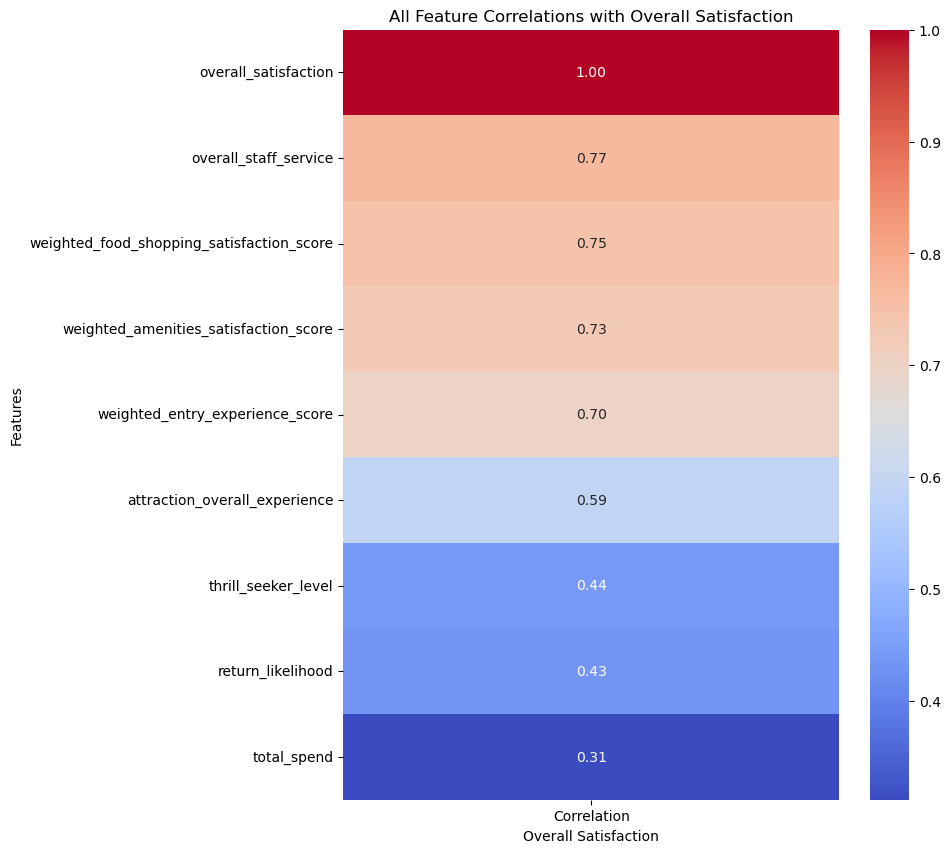

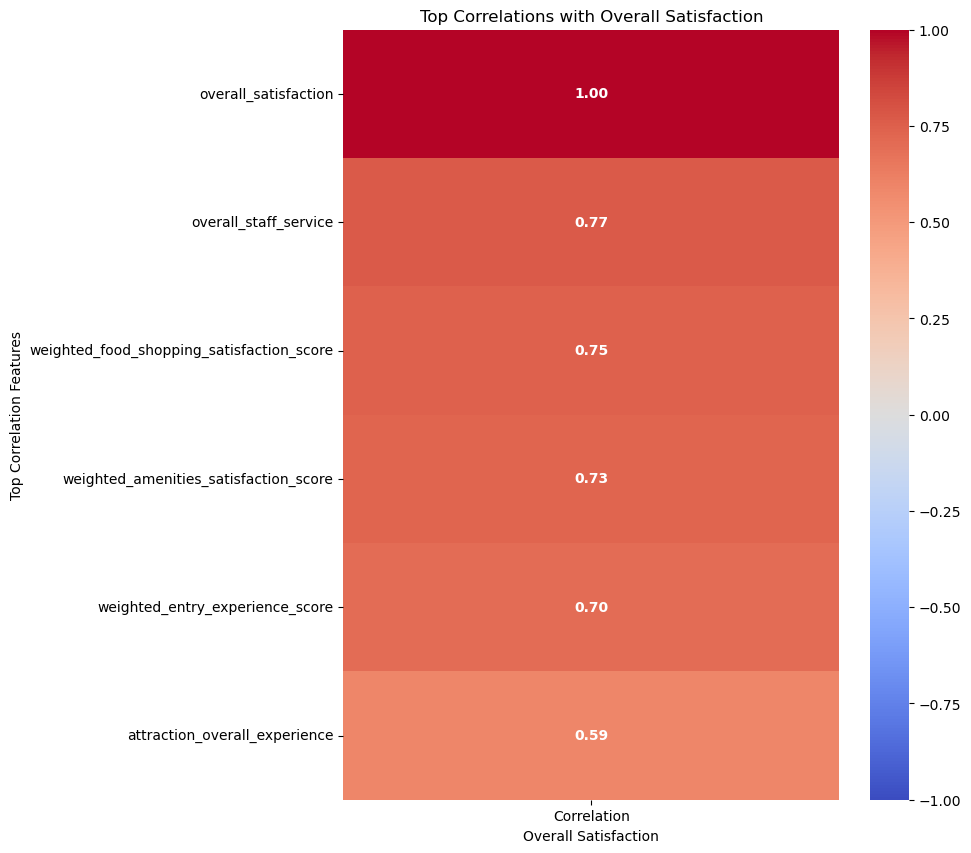

In [800]:
# Correlation Analysis
# Select only numeric features for correlation calculation
numeric_data = correlationplot.select_dtypes(include=[np.number])

# Calculate correlations with overall_satisfaction
correlations = numeric_data.corr()
satisfaction_corr = correlations['overall_satisfaction'].abs().sort_values(ascending=False)

# Print all correlations with overall_satisfaction
print("All Correlations with Overall Satisfaction:")
print(satisfaction_corr)

# Filter for features with high correlation (threshold > 0.5)
top_features = satisfaction_corr[satisfaction_corr > 0.5].index.tolist()

# Create DataFrame for top correlations
overall_satisfaction_corr_df = satisfaction_corr[top_features].to_frame(name='Correlation').sort_values(by="Correlation", ascending=False)

# Plot all correlations as a heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(
    satisfaction_corr.to_frame(name='Correlation'),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True
)
plt.title("All Feature Correlations with Overall Satisfaction")
plt.xlabel("Overall Satisfaction")
plt.ylabel("Features")
plt.show()

# Plot top correlations as a heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(
    overall_satisfaction_corr_df,
    annot=True,
    annot_kws={"weight": "bold"},  
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cbar=True
)
plt.title("Top Correlations with Overall Satisfaction")
plt.xlabel("Overall Satisfaction")
plt.ylabel("Top Correlation Features")
plt.show()

## Analysis of correlation between overall satisfaction and various factors

Based on the correlation table, the following factors were found to have the strongest relationships with overall guest satisfaction:

1. **Staff Service**: This has the highest correlation, suggesting that guest interactions with staff are critical to a positive experience. Improvements in staff service could significantly increase satisfaction levels.
2. **Food and Shopping**: Guests value high-quality food and shopping experiences. By offering diverse, high-quality food options and improving the shopping experience (e.g. merchandise), USS can increase guest satisfaction and drive higher spend.
3. **Amenities**: Clean and accessible amenities (restrooms, seating, etc.) are essential for guest comfort. Ensuring that these facilities are well-maintained and conveniently located will enhance the overall experience.
4. **Entry Experience**: A smooth, efficient, and welcoming entry process is key to setting a positive tone for the day. Streamlining entry points and ensuring staff are welcoming can improve first impressions and reduce stress at the start of the visit.
5. **Attraction Experience**: The quality of the attractions and how well they meet guest expectations is another key driver of satisfaction. Visitors who enjoy the attractions are more likely to report higher satisfaction.

## Touchpoints

1. **Entry Experience**
2. **Attraction Experience**

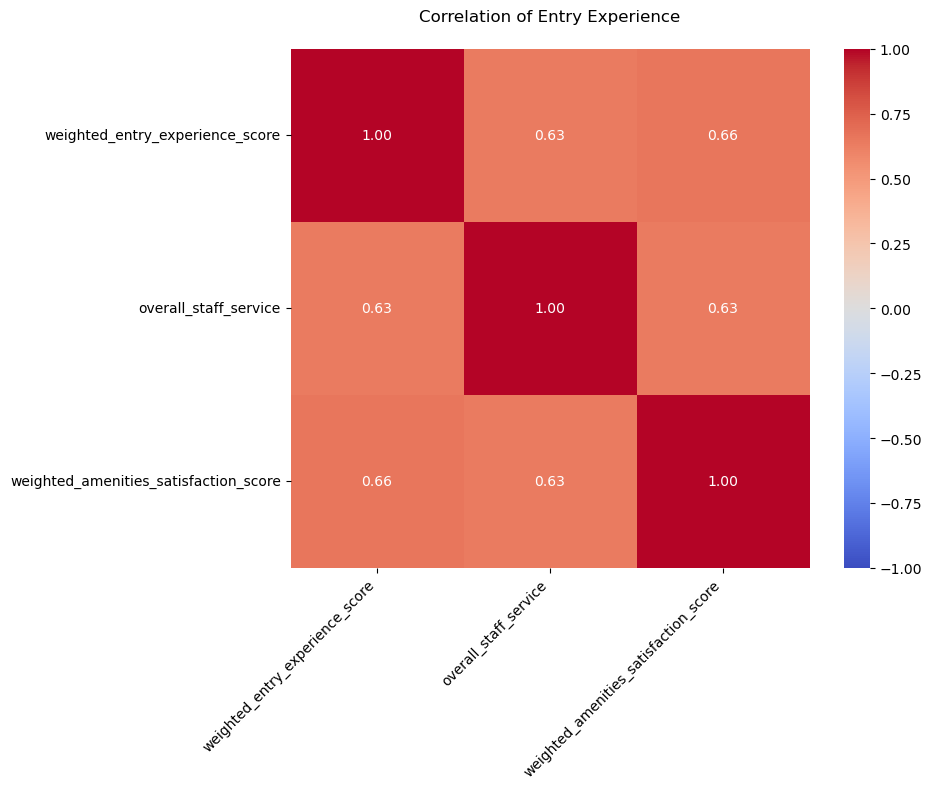

In [803]:
# Correlation with Entry Experience
entry_correlation_factors = correlationplot[['weighted_entry_experience_score','overall_staff_service', 'weighted_amenities_satisfaction_score']]

# Calculate correlations between these columns
correlation_matrix = entry_correlation_factors.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,         
            cmap='coolwarm',   
            vmin=-1,            
            vmax=1,              
            center=0,           
            square=True,        
            fmt='.2f')           

plt.title('Correlation of Entry Experience', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [804]:
# Verify the correlation, using 75% percentile
high_entry_threshold = correlationplot['weighted_entry_experience_score'].quantile(0.75)

# Filter for high entry experience scores
high_entry_df = correlationplot[correlationplot['weighted_entry_experience_score'] >= high_entry_threshold]

# Calculate mean scores for staff service and amenities for high entry experience group
high_entry_analysis = {
    'Staff Service Score': high_entry_df['overall_staff_service'].mean(),
    'Amenities Score': high_entry_df['weighted_amenities_satisfaction_score'].mean(),
}

# Compare with overall means
overall_analysis = {
    'Staff Service Score': correlationplot['overall_staff_service'].mean(),
    'Amenities Score': correlationplot['weighted_amenities_satisfaction_score'].mean(),
}

# Calculate percentage differences
percentage_diff = {}
for key in high_entry_analysis.keys():
    percentage_diff[key] = ((high_entry_analysis[key] - overall_analysis[key]) / overall_analysis[key] * 100)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'High Entry Experience': high_entry_analysis,
    'Overall Average': overall_analysis,
    'Percentage Difference (%)': percentage_diff
})

# Format the percentage differences to 2 decimal places
comparison_df['Percentage Difference (%)'] = comparison_df['Percentage Difference (%)'].round(2)


comparison_df

,High Entry Experience,Overall Average,Percentage Difference (%)
Staff Service Score,0.781250,0.702899,11.15
Amenities Score,0.711576,0.625886,13.69


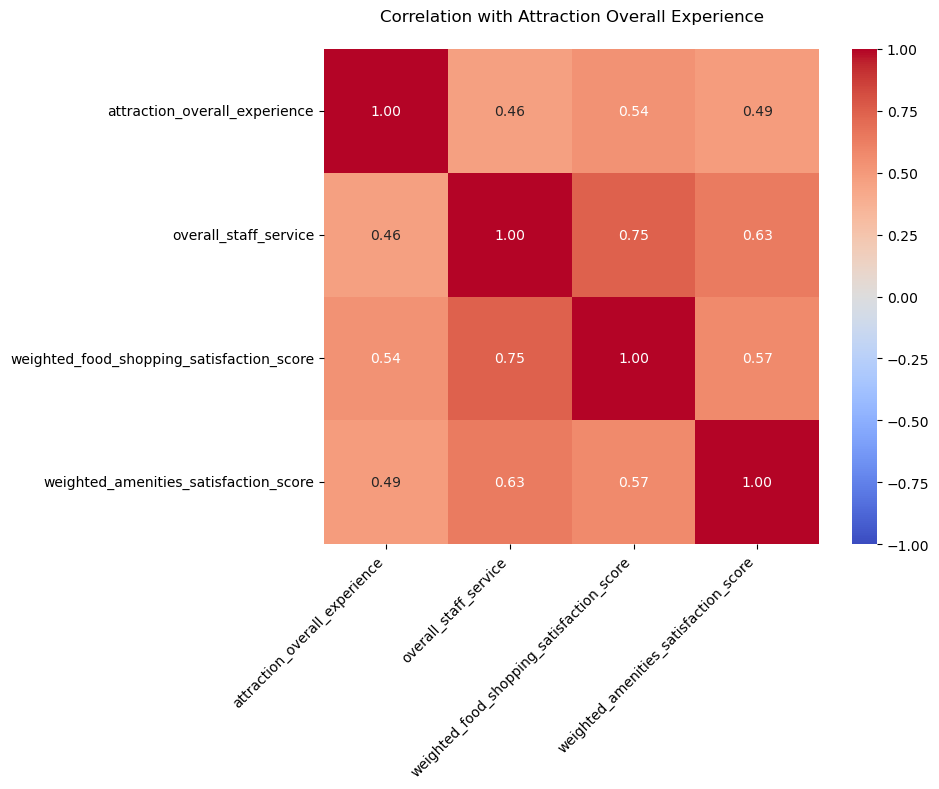

In [805]:
# Correlation with Attraction Overall Experience
attraction_correlation_factors = correlationplot[['attraction_overall_experience', 'overall_staff_service', 
                                                  'weighted_food_shopping_satisfaction_score', 
                                                  'weighted_amenities_satisfaction_score']]

# Calculate correlations between these columns
attraction_correlation_matrix = attraction_correlation_factors.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(attraction_correlation_matrix, 
            annot=True,         
            cmap='coolwarm',    
            vmin=-1,             
            vmax=1,             
            center=0,           
            square=True,        
            fmt='.2f')           

plt.title('Correlation with Attraction Overall Experience', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [806]:
# Verify the correlation, using 75% percentile
high_attraction_threshold = correlationplot['attraction_overall_experience'].quantile(0.75)

# Filter for high attraction experience scores
high_attraction_df  = correlationplot[correlationplot['attraction_overall_experience'] >= high_attraction_threshold]

# Calculate mean scores for all factors for high attraction experience group
high_attraction_analysis = {
    'Staff Service Score': high_attraction_df['overall_staff_service'].mean(),
    'Food & Shopping Score': high_attraction_df['weighted_food_shopping_satisfaction_score'].mean(),
    'Amenities Score': high_attraction_df['weighted_amenities_satisfaction_score'].mean()
}

# Compare with overall means
overall_analysis = {
    'Staff Service Score': correlationplot['overall_staff_service'].mean(),
    'Food & Shopping Score': correlationplot['weighted_food_shopping_satisfaction_score'].mean(),
    'Amenities Score': correlationplot['weighted_amenities_satisfaction_score'].mean()
}

# Calculate percentage differences
percentage_diff = {}
for key in high_attraction_analysis.keys():
    percentage_diff[key] = ((high_attraction_analysis[key] - overall_analysis[key]) / overall_analysis[key] * 100)

# Create comparison DataFrame
attraction_comparison_df = pd.DataFrame({
    'High Attraction Experience': high_attraction_analysis,
    'Overall Average': overall_analysis,
    'Percentage Difference (%)': percentage_diff
})

# Format the percentage differences to 2 decimal places
attraction_comparison_df['Percentage Difference (%)'] = attraction_comparison_df['Percentage Difference (%)'].round(2)

attraction_comparison_df

,High Attraction Experience,Overall Average,Percentage Difference (%)
Staff Service Score,0.754902,0.702899,7.40
Food & Shopping Score,0.525454,0.481123,9.21
Amenities Score,0.687984,0.625886,9.92


### Main Drivers of Satisfaction at the 2 touchpoints

1. **Entry Experience**

- Amenities: The correlation with Entry Experience is 0.66, indicating a strong positive relationship. Higher guest satisfaction with amenities (e.g., cleanliness, availability of services) significantly contributes to a better entry experience

- Staff Service: The correlation with Entry Experience is 0.63, which also reflects that the quality of interactions with USS staff, espeically at the entrance, like ticketing efficiency, are crucial to guest satisfaction.

- **Verification**: After filtering for high Entry Experience scores and comparing the Staff Service and Amenities Satisfaction scores, there was over 10% difference in scores, which strongly suggests that these two factors are indeed key drivers in enhancing guest entry Experience

2. **Attraction Experience**

- Food & Shopping: The correlation with Attraction Experience is 0.54, meaning guests who are satisfied with the food and shopping experience are more likely to report a higher level of satisfaction with the attractions. This could relate to overall park experience, including the variety and quality of food, as well as merchandise options available near attractions.

- Amenities: The correlation with Attraction Experience is 0.49, suggesting that well-maintained amenities (e.g., rest areas, cleanliness, availability of essential services) also contribute to a positive attraction experience.

- Staff Service: The correlation with Attraction Experience is 0.46, which indicates a moderate but positive relationship. Guest satisfaction with staff service (e.g., friendliness, assistance) impacts their overall enjoyment of the attractions.

- **Verification**: After filtering for high Attraction Experience scores and comparing the Staff Service, Food and Shopping, and Amenities Satisfaction score, there was a near 10% difference in scores, which suggests that these two factors contribute to a positive attraction experience.


Counter({'Thrill Rides': 4112, 'Special Events (e.g. Halloween Horror Nights)': 2686, 'Shows': 1811, 'Food and Shopping': 1535, 'Kid-friendly': 1458})


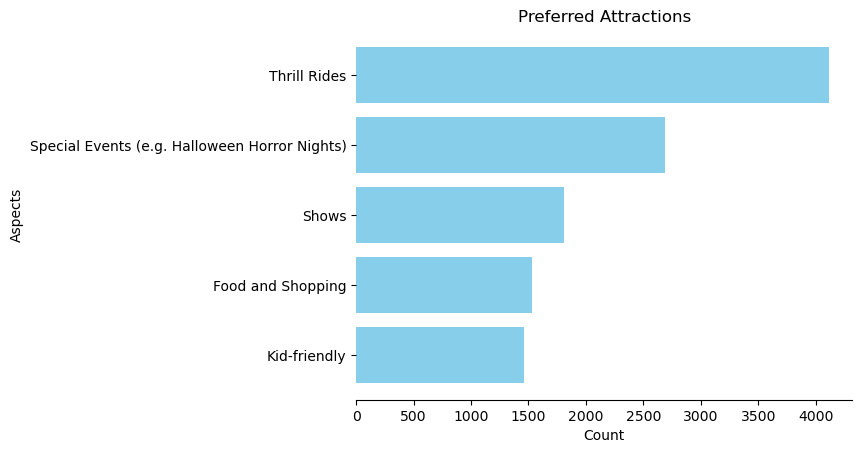

Counter({'Long wait times': 3956, 'Overcrowded attractions': 3517, 'Poor weather conditions': 1581, 'Limited dining options': 1268, 'Ride breakdowns': 633, 'Unfriendly staff': 308, 'lame rides': 86})


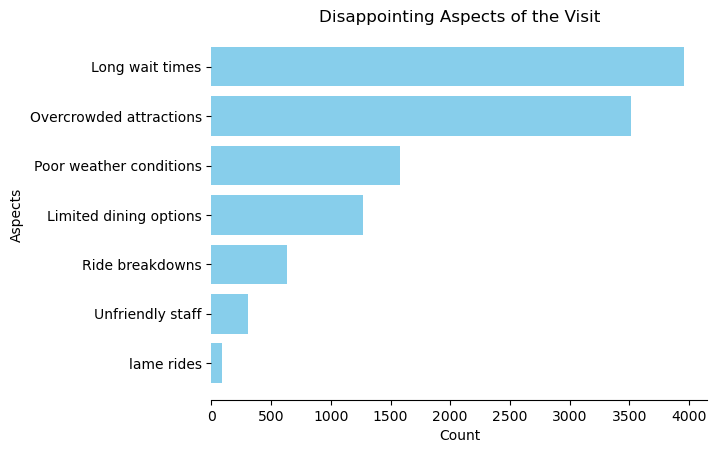

In [808]:
def analyze_select_all(data, question):
    responses = data[question].dropna().apply(str)
    
    all_options = [option.strip() for response in responses for option in response.split(',')]
    option_counts = Counter(all_options)
    print(option_counts)
    
    # Plot the word count graph
    options, counts = zip(*option_counts.most_common()) 
    plt.barh(options, counts, color='skyblue')
    plt.xlabel('Count')
    plt.ylabel("Aspects")
    plt.gca().invert_yaxis() 
    plt.grid(False)
    plt.gca().spines["top"].set_visible(False)  
    plt.gca().spines["right"].set_visible(False)  
    plt.gca().spines["left"].set_visible(False)
    plt.show()

plt.title("Preferred Attractions")
analyze_select_all(survey_data, 'what are your preferred attraction(s)? select all that apply.')

plt.title("Disappointing Aspects of the Visit")
analyze_select_all(survey_data, 'which aspect of your visit was the most disappointing? (select all that apply)')

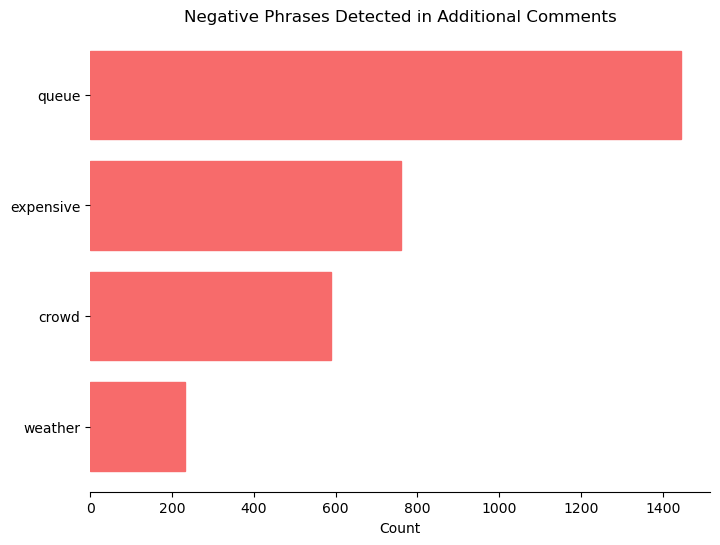

In [809]:
# Clean and lemmatize the responses
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
custom_stopwords = {'na', 'nil'}
stop_words.update(custom_stopwords)

def clean_and_lemmatize_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = [word for word in text.split() if word not in stop_words]
    lemmatized = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized)

responses = survey_data['additional_comments'].dropna().apply(str) 
cleaned_responses = responses.apply(clean_and_lemmatize_text)

# Predefined phrases to detect
negative_phrases = {
    "crowd": ["crowd", "crowds", "crowded", "overcrowded", "over crowd"],
    "queue": ["shorter waiting time", "less queue", "shorter queue", "faster queueing time", "faster queue"],
    "weather": ["fan", "aircon", "air con", "water cooler", "watercooler", "shade", "hot", "cooling", "humid", "shelter"],
    "expensive": ["expensive"]
}

# Map negative phrases to a one term
def map_to_unified_term(text, phrase_mapping):
    normalized_text = text.lower()
    for unified_term, phrases in phrase_mapping.items():
        for phrase in phrases:
            if phrase in normalized_text:
                normalized_text = normalized_text.replace(phrase, unified_term)
    return normalized_text

# Apply mapping to all responses
mapped_responses = cleaned_responses.apply(lambda text: map_to_unified_term(text, negative_phrases))


def detect_phrases(text_series, phrases):
    detected_counts = Counter()
    
    # Iterate over each comment in the text series
    for text in text_series.dropna():
        normalized_text = text.lower()
        # Check for each phrase in the normalized text
        for phrase in phrases:
            if phrase in normalized_text:
                detected_counts[phrase] += 1  
                
    return detected_counts


# Count detected phrases in additional comments
negative_counts = detect_phrases(cleaned_responses, negative_phrases)

negative_counts_sorted = dict(sorted(negative_counts.items(), key=lambda item: item[1], reverse=True))

# Prepare data for plotting
negative_phrases, negative_counts_values = zip(*negative_counts_sorted.items())

plt.figure(figsize=(8, 6))

plt.barh(negative_phrases, negative_counts_values, color="#f76b6b", edgecolor="#f76b6b")
plt.title("Negative Phrases Detected in Additional Comments")
plt.xlabel("Count")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest count at the top

# Customize the plot
plt.grid(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

# Show the plot
plt.show()

## Main Drivers of Dissatisfaction at the 2 touchpoints

1. **Entry Experience**

- Long Wait Times/ Queue: These are the most common complains of the negative experience in USS. As the first point of contact when arriving at the park, the entry process plays a crucial role in shaping the initial impression of the overall guest experience, and long queues are a significant driver of dissatisfaction at the entry experience for guests visiting USS. 

2. **Attraction Experience**

- Long Wait Times/ Queue: When wait times for popular attractions are long (eg, Thrill rides), guests may feel frustrating as it is a wasted opportunity for them. They want to maximize their time spent on experiences and attractions, and when they spend a large portion of their visit waiting, it diminishes their sense of satisfaction and overall enjoyment, negatively impacting the guest’s mood and perception of the park.

- Overcrowding: These are also frequently mentioned by visitors as a negative point in their experience at USS. Overcrowded attractions not only reduce the comfort of the visit but also limit guests' ability to enjoy the full range of experiences, especially on high-demand rides. This sense of congestion can lead to disappointment and a perception that the park is not providing enough space or resources for all guests.

- Poor Weather Conditions: Poor weather can reduce the overall enjoyment of the park visit. high temperatures and humidity in Singapore can make waiting in line for attractions or walking around the park uncomfortable. Rain can lead to canceled shows, closed attractions, or guests becoming drenched if there aren’t enough sheltered areas. This impacts the mood of guests and can lead to frustration if they feel that the park is not offering a way to manage the weather-related inconveniences.

---

### Summary: The "Triple Whammy" Effect

When these three factors— **long wait times, overcrowding, poor weather** — combine, they create a "triple whammy" effect, where each element compounds the other to create an environment of discomfort and dissatisfaction. 
- Overcrowding increases wait times for attractions and creates a feeling of congestion, making it harder for guests to fully enjoy the park's offerings.
- Long wait times lead to frustration, especially when guests are forced to stand in queues for extended periods in the hot, humid Singapore weather, intensifying discomfort.
- The hot weather makes the overcrowded, lengthy waits feel even more unbearable, creating an overwhelming and physically exhausting experience rather than a fun and exciting one.

## Score Calculation: From USS's Business Perspective
To track guest satisfaction over time and align with USS's business objectives (increasing revenue and footfall), we can define 2 key metrics based on the drivers of satisfaction identified in our analysis. These metrics should reflect the quality of the guest experience.

| **Metric**                         | **Description**                                                                                                                                                        | **Business Impact**                                                                                                       | **Weightage** |
|------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------|---------------|
| **Visitor Experience**             | Measures guest satisfaction with entry processes, service quality, amenities, and park cleanliness. This includes **Staff Service**, **Amenities Satisfaction**, and **Entry Experience**. | A positive first impression boosts guest satisfaction, coupled with an enjoyable time at the park drive repeat visits, and word-of-mouth recommendations, directly increasing both **footfall** and **revenue generation**. | **53%**       |
| **Food & Shopping Satisfaction**  | Measures guest satisfaction with food offerings, shopping variety, pricing, and overall experience with merchandise.                                                   | A positive food and shopping experience encourages guests to spend more on food and merchandise, directly impacting **revenue**. | **47%**       |

---

### Calculation of the Overall Satisfaction Score

The overall satisfaction score is calculated as a weighted average of **Visitor Experience** and **Food & Shopping Satisfaction**:
The correlation with Overall Satisfaction is 0.86 and 0.75 respectively, so the weightage is determined by normalising the weights, which gives 53% and 47% respectively

---

- **Visitor Experience**: With a weight of **53%**, this metric is considered the most impactful in driving guest satisfaction. Factors like **service**, **entry experience**, and **amenities** contribute significantly to how guests perceive their time at USS.
- **Food & Shopping Satisfaction**: With a weight of **47%**, this metric is crucial for driving **revenue** but is secondary to the overall experience of the park. Positive guest satisfaction with food and shopping experiences increases **per capita revenue**.

---

### Business Implications

- **Visitor Experience**: Directly linked to **repeat visits**, **guest retention**, and **first impressions**, making it critical for increasing footfall.
- **Food & Shopping Satisfaction**: Influences **revenue generation** as satisfied guests are more likely to spend on food, beverages, and merchandise.


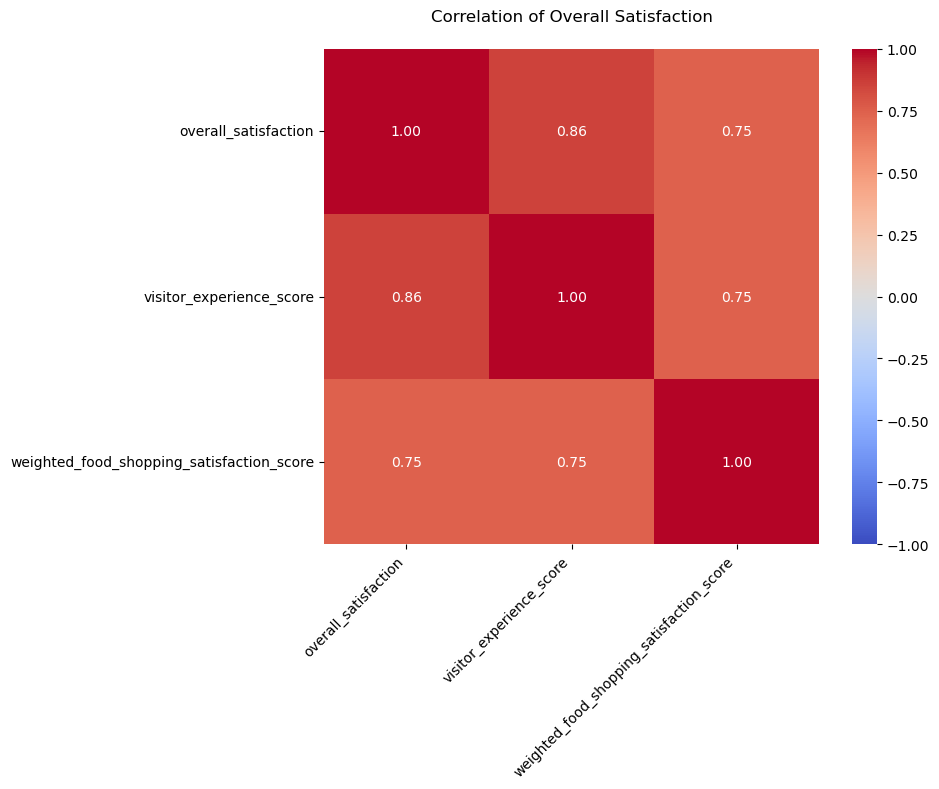

In [813]:
# Metric Score Calculation
# Find the correlations value from the first table (overall satisfaction)
visitor_experience_correlations = {
    'overall_staff_service': 0.77,
    'weighted_amenities_satisfaction_score': 0.73,
    'weighted_entry_experience_score': 0.70,
    'attraction_overall_experience': 0.59
}

# Step 1: Calculate the sum of all correlations
total_correlation = sum(visitor_experience_correlations.values())

# Step 2: Normalize each correlation to get the weights
weights = {key: value / total_correlation for key, value in visitor_experience_correlations.items()}

correlationplot['visitor_experience_score'] = (
    (correlationplot['overall_staff_service'] * weights['overall_staff_service']) +
    (correlationplot['weighted_amenities_satisfaction_score'] * weights['weighted_amenities_satisfaction_score']) +
    (correlationplot['weighted_entry_experience_score'] * weights['weighted_entry_experience_score']) +
    (correlationplot['attraction_overall_experience'] * weights['attraction_overall_experience'])
)

# Correlation plot
metric_correlation_factors = correlationplot[['overall_satisfaction','visitor_experience_score', 'weighted_food_shopping_satisfaction_score']]

# Calculate correlations between these columns
metric_correlation_matrix = metric_correlation_factors.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(metric_correlation_matrix, 
            annot=True,         
            cmap='coolwarm',   
            vmin=-1,            
            vmax=1,              
            center=0,           
            square=True,        
            fmt='.2f')           

plt.title('Correlation of Overall Satisfaction', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [814]:
# Correlations of Visitor Experience and Food Shopping Satisfaction
correlation_values = [0.86, 0.75] 
total_correlation = sum(correlation_values)

# Normalize the correlations to get the weights
weights = [value / total_correlation for value in correlation_values]

visitor_experience_weight = weights[0]  
food_shopping_weight = weights[1]     

# Calculate the overall satisfaction score based on the weights
correlationplot['overall_satisfaction_score'] = (
    (correlationplot['visitor_experience_score'] * visitor_experience_weight) + 
    (correlationplot['weighted_food_shopping_satisfaction_score'] * food_shopping_weight)
)

average_overall_score = correlationplot['overall_satisfaction_score'].mean()

print(f"Average Overall Score: {average_overall_score}")


Average Overall Score: 0.5863798685414219


The proposed metrics for tracking guest satisfaction are directly aligned with USS's core business goals of increasing **Revenue** and **Footfall**. USS can prioritise enhancements in areas that directly influence customer spending and repeat visits. Improved guest satisfaction in these areas not only increases the likelihood of return visits but also boosts word-of-mouth recommendations, helping to attract new visitors and drive higher footfall. Ultimately, this data-driven approach enables USS to optimise the guest experience, leading to sustained revenue growth and greater park attendance.